In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os
df = pd.read_excel('./datasets/training.xlsx', sheet_name='Data')

In [13]:
# Remove commas and convert Load to numeric
df['Load'] = pd.to_numeric(df['Load'].astype(str).str.replace(',', ''), errors='coerce')
# List temperature columns explicitly from your provided structure
temp_columns = ['Site-1 Temp', 'Site-2 Temp', 'Site-3 Temp', 'Site-4 Temp', 'Site-5 Temp']
GHI_columns = ['Site-1 GHI', 'Site-2 GHI', 'Site-3 GHI', 'Site-4 GHI', 'Site-5 GHI']

# Compute correlations with Load
correlations = {site: df[site].corr(df['Load']) for site in temp_columns}
correlations2 = {site: df[site].corr(df['Load']) for site in GHI_columns}
for site in temp_columns:
    corr = df[site].corr(df['Load'])
    print(f"Correlation between {site} and Load: {corr:.4f}")
# Convert to pandas Series for easy plotting
correlation_series = pd.Series(correlations)
correlation_series2 = pd.Series(correlations2)


Correlation between Site-1 Temp and Load: 0.3967
Correlation between Site-2 Temp and Load: 0.3963
Correlation between Site-3 Temp and Load: 0.4007
Correlation between Site-4 Temp and Load: 0.3963
Correlation between Site-5 Temp and Load: 0.4038


In [14]:
# # Take absolute values of correlations
# abs_corr = correlation_series.abs()
# abs_corr2 = correlation_series2.abs()
# 
# # Normalize so that the sum is 1
# comparative_corr = abs_corr / abs_corr.sum()
# comparative_corr2 = abs_corr2 / abs_corr2.sum()


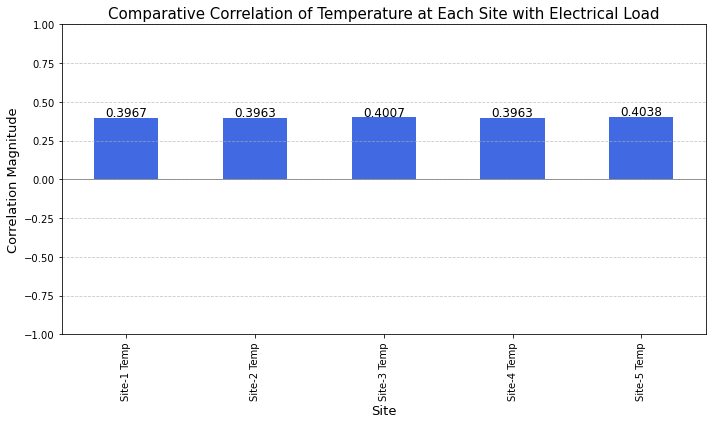

In [15]:
plt.figure(figsize=(10, 6))
correlation_series.plot(kind='bar', color='royalblue')

# Graph Details
plt.title('Comparative Correlation of Temperature at Each Site with Electrical Load', fontsize=15)
plt.xlabel('Site', fontsize=13)
plt.ylabel('Correlation Magnitude', fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(0, color='gray', linewidth=0.8)
plt.ylim(-1, 1)  # Ensuring scale reflects correlation range
for index, value in enumerate(correlation_series):
    plt.text(index, value + 0.01, f'{value:.4f}', ha='center', fontsize=12)
plt.tight_layout()
plt.show()


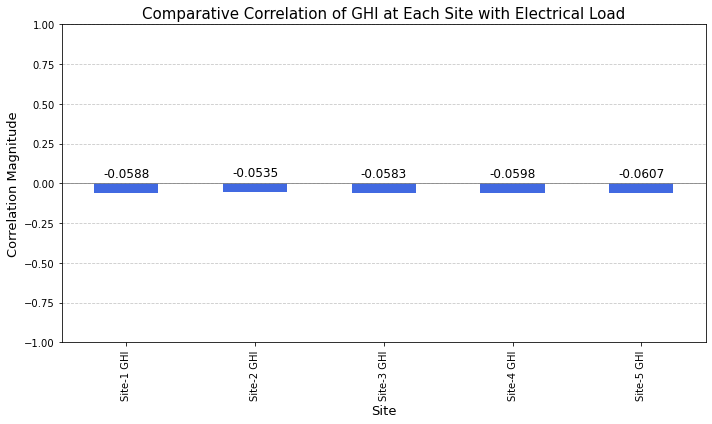

In [16]:
plt.figure(figsize=(10, 6))
correlation_series2.plot(kind='bar', color='royalblue')

# Graph Details
plt.title('Comparative Correlation of GHI at Each Site with Electrical Load', fontsize=15)
plt.xlabel('Site', fontsize=13)
plt.ylabel('Correlation Magnitude', fontsize=13)
plt.ylim(-1, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(0, color='gray', linewidth=0.8)
for index, value in enumerate(correlation_series2):
    plt.text(index, value + 0.1, f'{value:.4f}', ha='center', fontsize=12)

plt.tight_layout()
output_dir = "./figures"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

output_filename = os.path.join(output_dir, f"correlation_GHI_loadsite-5.pdf")
plt.savefig(output_filename, format='pdf')

plt.show()

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define your feature groups clearly
features = {
    'All Features': ['Site-1 Temp', 'Site-2 Temp', 'Site-3 Temp', 'Site-4 Temp', 'Site-5 Temp',
                     'Site-1 GHI', 'Site-2 GHI', 'Site-3 GHI', 'Site-4 GHI', 'Site-5 GHI'],
    'Temperature Only': ['Site-1 Temp', 'Site-2 Temp', 'Site-3 Temp', 'Site-4 Temp', 'Site-5 Temp'],
    'GHI Only': ['Site-1 GHI', 'Site-2 GHI', 'Site-3 GHI', 'Site-4 GHI', 'Site-5 GHI']
}

y = df['Load']
models = {}
importances = {}

# Loop clearly through each feature set, training models separately
for label, feats in features.items():
    X = df[feats]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Train and store model clearly
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    models[label] = model
    
    # Store feature importances
    importances[label] = pd.Series(model.feature_importances_, index=feats).sort_values(ascending=False)


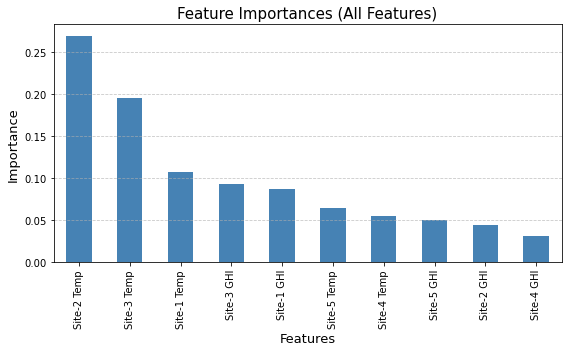

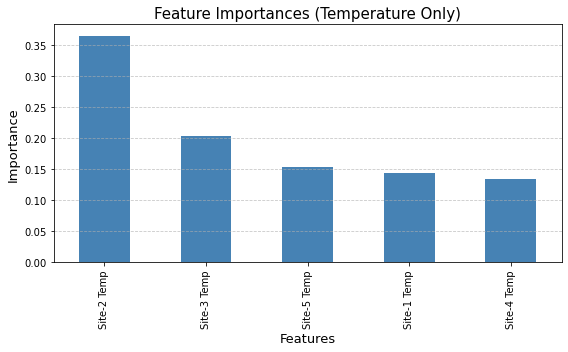

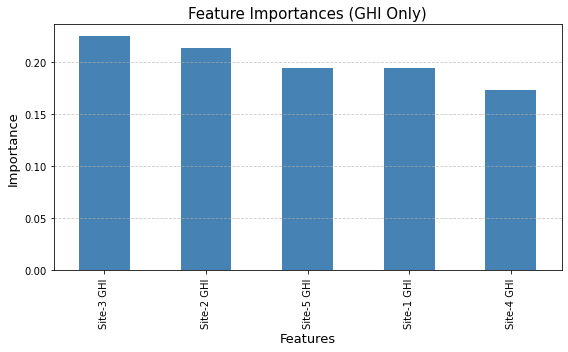

In [11]:
for label, importance in importances.items():
    plt.figure(figsize=(8, 5))
    importance.plot(kind='bar', color='steelblue')
    plt.title(f'Feature Importances ({label})', fontsize=15)
    plt.xlabel('Features', fontsize=13)
    plt.ylabel('Importance', fontsize=13)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()